In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model as lm

In [3]:
df = pd.DataFrame({'Area' : [2600, 3000, 3200, 3600, 4000],
                  'Price' : [550000, 565000, 610000, 680000, 725000]})
df

Area   Price
0  2600  550000
1  3000  565000
2  3200  610000
3  3600  680000
4  4000  725000

In [4]:
df.to_csv('HomePrices.csv')

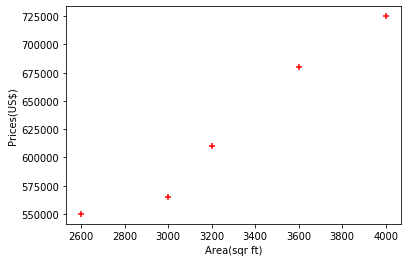

In [38]:
%matplotlib inline
plt.xlabel('Area(sqr ft)')
plt.ylabel('Prices(US$)')
plt.scatter(df['Area'], df['Price'], color = 'red', marker = '+')

In [27]:
reg = lm.LinearRegression()
reg.fit(df[['Area']], df['Price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
reg.predict([[3300]])

array([628715.75342466])

In [29]:
reg.coef_ #value of m in y = mx+b

array([135.78767123])

In [30]:
reg.intercept_ #value of b in y = mx+b

180616.43835616432

In [31]:
reg.predict([[5000]])

array([859554.79452055])

In [32]:
d = pd.DataFrame({'Area' : [1000, 1500, 2300, 3540, 4120, 4560, 5490, 3460, 4750, 2350, 9000, 8600, 7100]})
d

Area
0   1000
1   1500
2   2300
3   3540
4   4120
5   4560
6   5490
7   3460
8   4750
9   2350
10  9000
11  8600
12  7100

In [33]:
d.to_csv('Areas to predict.csv')

In [34]:
reg.predict(d)

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        499717.46575342, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [35]:
d['Price'] = reg.predict(d)
d.head()

Area          Price
0  1000  316404.109589
1  1500  384297.945205
2  2300  492928.082192
3  3540  661304.794521
4  4120  740061.643836

In [37]:
d.to_csv('Areas Predicted.csv', index = False)

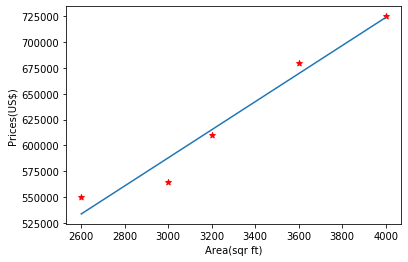

In [51]:
%matplotlib inline
plt.xlabel('Area(sqr ft)')
plt.ylabel('Prices(US$)')
plt.scatter(df['Area'], df['Price'], color = 'red', marker = '*')
plt.plot(df['Area'], reg.predict(df[['Area']]))